In [3]:
# Anonomise Uranium data 

In [1]:
import numpy as np
import pandas as pd
import random
import sys
import matplotlib.pyplot as plt
import icecream as ic



In [4]:
collars = pd.read_excel("C:/Users/fanie/2025-01-20_project_cory/01_downloads/11 Geology/11.3 Drill Hole Database/11.3.1 Drilling Data/11.3.1.3 Etango_Collars.xlsx")
collars.head()


# Middle domain only
collars = collars[(collars['NORTH'] > 7487450) & (collars['NORTH'] < 7488950)]
# EXPLORATION only
collars = collars[collars['Hole_Type'] == 'EXPLORATION']

# HoleID mapping
hids = collars['HOLEID'].unique()
hole_mapping = {hid: f"DH_{num:03d}" for num, hid in enumerate(hids)}


xlim= [collars['EAST'].min(), collars['EAST'].max()]
ylim= [collars['NORTH'].min(), collars['NORTH'].max()]
zlim= [collars['RL'].min(), collars['RL'].max()]

collars['DHID'] = collars['HOLEID'].map(hole_mapping)
collars['x'] = collars['EAST'] - xlim[0]
collars['y'] = collars['NORTH'] - ylim[0]
collars['z'] = collars['RL'] - zlim[0]

collars = collars[['DHID','Drill_Type','x','y','z']]
print(collars['DHID'].nunique())

410


<Axes: xlabel='x', ylabel='y'>

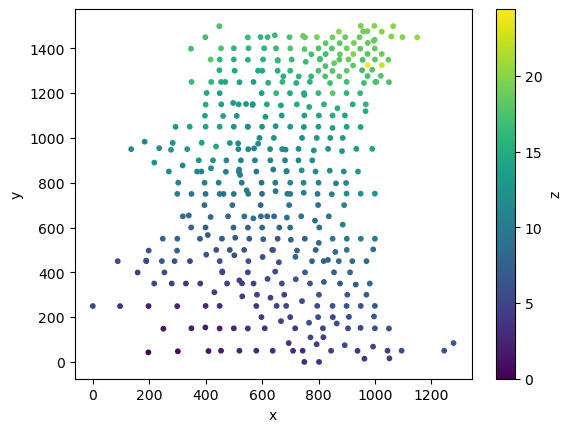

In [5]:
collars.plot.scatter(x='x', y='y', c='z', cmap='viridis', s=10)

In [6]:
# Survey
survey = pd.read_excel("C:/Users/fanie/2025-01-20_project_cory/01_downloads/11 Geology/11.3 Drill Hole Database/11.3.1 Drilling Data/11.3.1.5 Etango_Survey.xlsx")
survey['DHID'] = survey['HOLEID'].map(hole_mapping)
survey =survey[survey['DHID'].notna()]
#survey['AZIMUTH'] = (survey['AZIMUTH'] + 90).apply(lambda x: x if x < 360 else x - 360)
survey = survey[['DHID','DEPTH', 'AZIMUTH', 'DIP']]
survey = survey.rename(columns = {'DEPTH':'depth', 'AZIMUTH':'azimuth', 'DIP':'dip'})

print(survey['DHID'].nunique())

410


In [7]:
# Lithology
lith = pd.read_excel("C:/Users/fanie/2025-01-20_project_cory/01_downloads/11 Geology/11.3 Drill Hole Database/11.3.1 Drilling Data/11.3.1.4 Etango_Lithology.xlsx")

In [153]:
lith_map = {'SND':'CR_1',
            'GALD':'PEGM',
            'CGN':'CR_2',
            'GALE':'PEGM',
            'GALU':'CR_3',
            'QZ':'CR_4',
            'GRUN':'CR_5',
            'QTZ':'CR_6',
            'GRED':'CR_7',
            'GALF':'CR_8',
            'GALB':'CR_9',
            'KGN':'CR_10',
            'EGN':'CR_11',
            'CAL':'CR_12',
            'GYP':'CR_13',
            'NLST':'CR_14',
            'NRCK':'CR_15',
            'GALA':'CR_16',
            'GALC':'CR_17',
            'NPRC':'CR_18'} 
lith['DHID'] = lith['HOLE ID'].map(hole_mapping)
lith['lith'] = lith['Lithology'].map(lith_map)
lith = lith[lith['DHID'].notna()]

lith =lith.rename(columns={'From (m)':'from','To (m)':'to'})
lith = lith[['DHID','from','to','lith']]

print(lith['DHID'].nunique())

410


In [8]:
# Assay
assay = pd.read_excel("C:/Users/fanie/2025-01-20_project_cory/01_downloads/11 Geology/11.3 Drill Hole Database/11.3.1 Drilling Data/11.3.1.1 Etango_Assays.xlsx")

assay['DHID'] = assay['HOLEID'].map(hole_mapping)
assay = assay[assay['DHID'].notna()]
assay['grade'] = (assay['U3O8_ppm']/assay['U3O8_ppm'].mean()) * 100
assay = assay.rename(columns = {'FROM (m)':'from','TO (m)':'to'})
assay = assay[['DHID','from','to','grade']]
assay.loc[assay['grade']<0, 'grade'] = 0.1

print(assay['DHID'].nunique())

410


In [9]:
collars.to_csv('../00_Datasets/collars_pegm.csv', index=False)
survey.to_csv('../00_Datasets/survey_pegm.csv', index=False)
lith.to_csv('../00_Datasets/lith_pegm.csv', index=False)
assay.to_csv('../00_Datasets/assay_pegm.csv', index=False)